# Домашнее задание №2

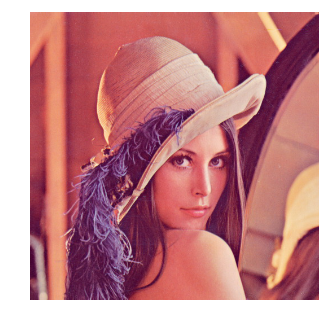

In [1]:
import cv2
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

def show(img):
    ax = plt.axes([0,0,1,1], frameon=False)
    ax.set_axis_off()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

def show_gray(img):  
    ax = plt.axes([0,0,1,1], frameon=False)
    ax.set_axis_off()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
    
img = cv2.imread("lena.jpg")
show(img)

In [75]:
def show_imgs(*imgs):
    if (len(imgs) > 3):
        columns_cnt = 3
    else:
        columns_cnt = len(imgs)
    rows_cnt = len(imgs) // columns_cnt + 1   
        
    fig = plt.figure(figsize=(10, 10))
    for count, img in enumerate(imgs):
        a = fig.add_subplot(rows_cnt, columns_cnt, count + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

**1. (3 балла)** Реализуйте самостоятельно функцию градационного преобразования вида $T(r)=ar+b$, просто с помощью попиксельного обхода изображения. Примените его к изображению lena.jpg с параметрами $a = 2$, $b = 100$. Примените к исходному изображению стандартную функцию $convertTo$ с теми же параметрами. Убедитесь, что получилось одно и то же.                                                            

In [76]:
def T(r, a, b):
    return a * r + b

def gradation_conversion(img, a, b):
    img_tmp = np.zeros_like(img)
    
    s1, s2, s3 = img.shape
    for i in np.arange(s1):
        for j in np.arange(s2):
            for k in np.arange(s3): 
                t = T(img[i][j][k], a, b)
                if (t > 255):
                    t = 255
                img_tmp[i][j][k] = t
           
    return img_tmp   

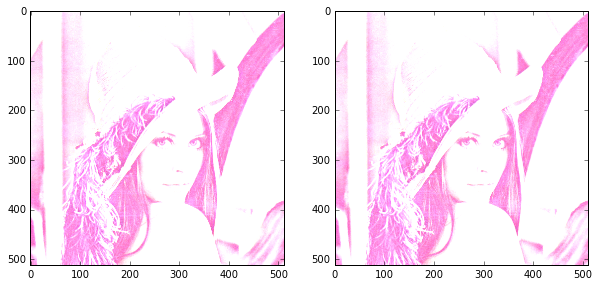

In [77]:
my_grad_img = gradation_conversion(img, 2, 100)
cv_grad_img = cv2.addWeighted(src1 = img, src2 = img, alpha = 2, beta = 0, gamma = 100)

show_imgs(my_grad_img, cv_grad_img)

Как видно, изображения полностью совпадают. Нет нужды в попиксельной разности :)

**2. (3 балла)** Загрузите изображение lena.jpg. Усредните значения всех трех цветовых каналов в каждый из каналов итогового изображения.

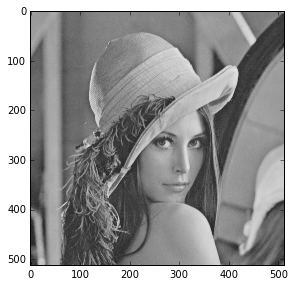

In [78]:
def img_to_gray(img_cv):
    s1, s2, s3 = img_cv.shape
    img = np.empty_like(img_cv)
    for i in np.arange(s1):
        for j in np.arange(s2):
            b, g, r = img_cv[i][j]
            img[i][j] = (int(r) + g + b) // 3
    return img

img_gray = img_to_gray(img)
show_imgs(img_gray)

**3. (3 балла)** Загрузите изображение $lena.jpg$. Переведите изображение в градации серого. Примените к серому изображению операцию линейного растяжения диапазона яркостей ($normalize$) и эквализации гистограммы ($equalizeHist$). Постройте разность полученных результатов. Состыкуйте в одно изображение в градациях серого результат линейного растяжения, эквализации и их разности.

In [79]:
img_gray_cv = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

norm_img = np.zeros_like(img_gray_cv)
cv2.normalize(img_gray_cv, norm_img, alpha = 0, beta = 255,  norm_type=cv2.NORM_MINMAX)

equ = cv2.equalizeHist(img_gray_cv)

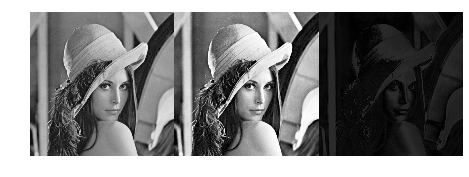

In [80]:
def get_mean_difference(img_gray_cv, img_gray):
    s1, s2  = img_gray.shape
    diff = np.empty_like(img_gray)
    for i in np.arange(s1):
        for j in np.arange(s2):
            g = img_gray[i][j]
            t = int(img_gray_cv[i][j])
            diff[i][j] = abs(t - g)
    return diff

diff = get_mean_difference(norm_img, equ)

res = np.hstack((norm_img, equ, diff))
show_gray(res)

**4. (3 балла) ** Реализуйте функцию добавления шума «соль и перец» для одноканального изображения. Входные параметры: $src$ – исходная одноканальная матрица $Mat$, $p$ – вероятность замещения исходных значений на $0$, $q$ – вероятность замещения исходных значений на $255$. Загрузите изображение $lena.jpg$, выделите каналы изображения в отдельные матрицы ($split$), добавьте шум «соль и перец» в каждый канал при помощи реализованной Вами функции с параметрами

1. $p=q=0.05$
2. $p=q=0.1$
3. $p=q=0.15$

In [81]:
def salt_pepper(src, p, q):
    s1, s2 = src.shape
    for i in np.arange(s1):
        for j in np.arange(s2):
            if (np.random.random() < p):
                src[i][j] = 0
            if (np.random.random() < q):
                src[i][j] = 255    
            
    return src        

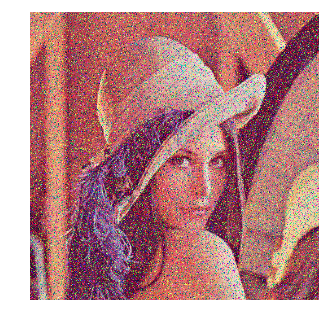

In [82]:
img = cv2.imread("lena.jpg")
b, g, r = cv2.split(img)
b = salt_pepper(b, 0.05, 0.05)
g = salt_pepper(g, 0.1, 0.1)
r = salt_pepper(r, 0.15, 0.15)

img_salt_pepper = cv2.merge((b, g, r))
show(img_salt_pepper)

**5. (6 баллов)** Загрузите изображение $lena.jpg$ (512х512). Переведите изображение в градации серого. Произведите фильтрацию данного изображения в частотной области идеальным фильтром низких частот (фильтр, обрезающий все высокочастотные составляющие Фурье-образа, находящиеся на большем расстоянии от начала координат, чем некоторое заданное расстояние $D$), идеальным фильтром высоких частот (фильтр, обрезающий все низкокочастотные составляющие Фурье-образа, находящиеся на меньшем расстоянии от начала координат, чем некоторое заданное расстояние $D$) со следующими значениями радиуса фильтров:
1. 5
2. 15
3. 30
4. 255

Для каждого фильтра постройте состыкованное изображение из следующих: исходное изображение в градациях серого, изображение Фурье-спектра (после логарифмической коррекции для лучшей визуализации), изображение Фурье-спектра после фильтрации, изображение в пространственной области после фильтрации. На выходе должно получиться 8 изображений (4 параметра фильтров х 2 типа фильтров). Функции, которые Вам потребуются: $dft$, $mulSpectrums$, $idft$.

In [83]:
def dft_D_remove_high(img_gray_cv, D):
    rows, cols = img_gray_cv.shape
    crow,ccol = rows/2 , cols/2

    # create a mask first, center square is 1, remaining all zeros
    mask = np.zeros((rows,cols,2),np.uint8)
    mask[crow-D:crow+D, ccol-D:ccol+D] = 1

    
    dft = cv2.dft(np.float32(img_gray_cv),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    magnitude_spectrum = np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
    
    # apply mask and inverse DFT
    fshift = dft_shift*mask   
    f_ishift = np.fft.ifftshift(fshift)
    magnitude_spectrum_mask = np.log(cv2.magnitude(f_ishift[:,:,0],dft_shift[:,:,1]))
    
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

    fig = plt.figure(figsize=(7, 7))
    plt.subplot(221),plt.imshow(cv2.cvtColor(img_gray_cv, cv2.COLOR_GRAY2RGB))
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(222),plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.subplot(223),plt.imshow(magnitude_spectrum_mask, cmap = 'gray')
    plt.title('Magnitude Spectrum With Mask'), plt.xticks([]), plt.yticks([])
    plt.subplot(224),plt.imshow(img_back, cmap = 'gray')
    plt.title('Output Image'), plt.xticks([]), plt.yticks([])
    plt.show()  

In [84]:
def dft_D_remove_low(img_gray_cv, D):
    rows, cols = img_gray_cv.shape
    crow,ccol = rows/2 , cols/2

    # create a mask first, center square is 1, remaining all zeros
    mask = np.ones((rows,cols,2),np.uint8)
    mask[crow-D:crow+D, ccol-D:ccol+D] = 0
    
    dft = cv2.dft(np.float32(img_gray_cv),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    magnitude_spectrum = np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
    
    # apply mask and inverse DFT
    fshift = dft_shift*mask   
    f_ishift = np.fft.ifftshift(fshift)
    magnitude_spectrum_mask = np.log(cv2.magnitude(f_ishift[:,:,0],dft_shift[:,:,1]))
    
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

    fig = plt.figure(figsize=(7, 7))
    plt.subplot(221),plt.imshow(cv2.cvtColor(img_gray_cv, cv2.COLOR_GRAY2RGB))
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(222),plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.subplot(223),plt.imshow(magnitude_spectrum_mask, cmap = 'gray')
    plt.title('Magnitude Spectrum With Mask'), plt.xticks([]), plt.yticks([])
    plt.subplot(224),plt.imshow(img_back, cmap = 'gray')
    plt.title('Output Image'), plt.xticks([]), plt.yticks([])
    plt.show()  

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


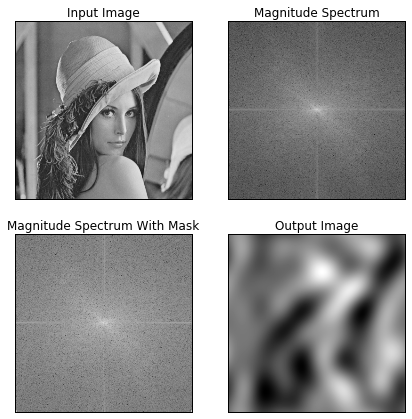

In [85]:
dft_D_remove_high(img_gray_cv, 5) 

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


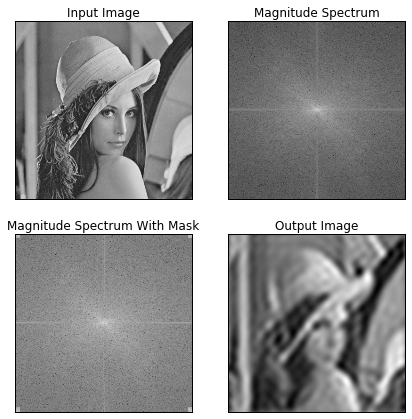

In [86]:
dft_D_remove_high(img_gray_cv, 15) 

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


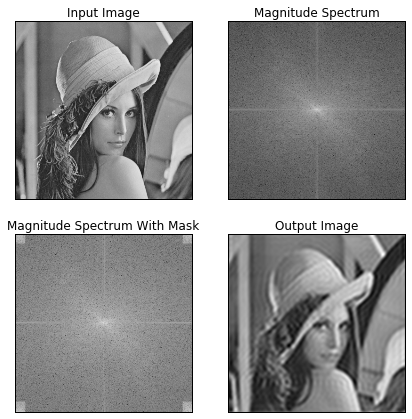

In [87]:
dft_D_remove_high(img_gray_cv, 30) 

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


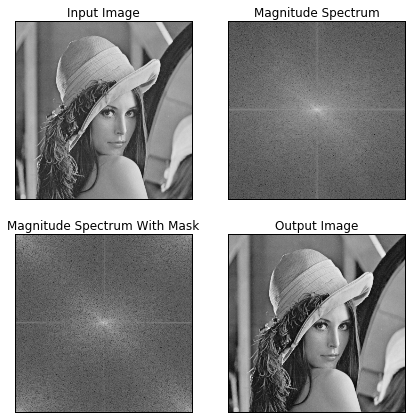

In [88]:
dft_D_remove_high(img_gray_cv, 255) 

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


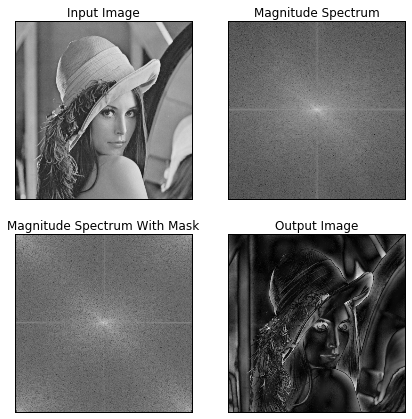

In [89]:
dft_D_remove_low(img_gray_cv, 5) 

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


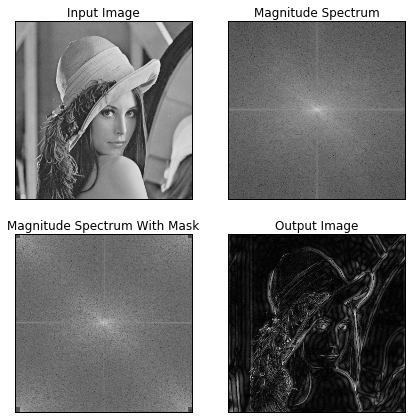

In [90]:
dft_D_remove_low(img_gray_cv, 15) 

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


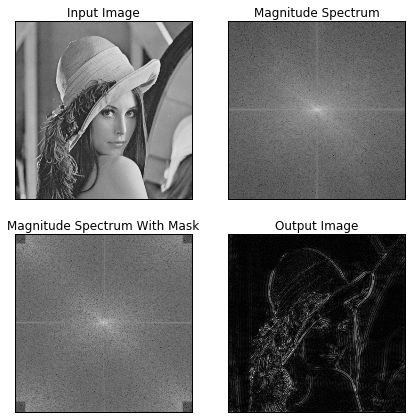

In [91]:
dft_D_remove_low(img_gray_cv, 30) 

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


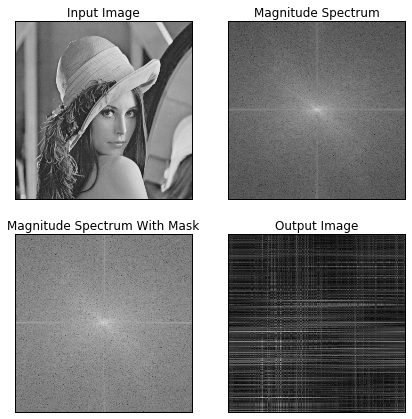

In [92]:
dft_D_remove_low(img_gray_cv, 255) 

**6. (5 баллов) **Удалите диагональные полоски с изображения $lena\_diagonal.jpg$. Вычислите среднеквадратичную ошибку (mean squared error, $MSE$, \url{http://en.wikipedia.org/wiki/Mean_squared_error}) для полученного результата и изображения $lena\_gray\_512.tif$. Задача будет засчитана при $MSE < 1500$. Тот, у кого по результатам проверки будет наименьшее значение MSE среди всех студентов для этой задачи, получит призовую шоколадку (раньше мы раздавали призовые баллы, но теперь у нас концепция фиксированного максимального количества баллов)

In [101]:
def MSE(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1] * imageA.shape[2])
    return err

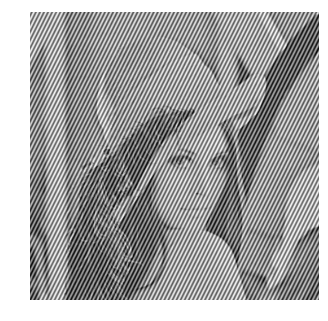

In [102]:
img_diagonal = cv2.imread("lena_diagonal.jpg")
img_gray_512 = cv2.imread("lena_gray_512.tif")
show(img_diagonal)

Пока выполню задачу, а к жесткому дедлайну попробую придумать, как минимизировать MSE еще сильнее

MSE = 948.230098724


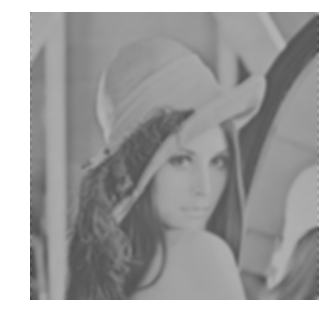

In [133]:
g_blur = cv2.GaussianBlur(img_diagonal,(11,11), 3)
print('MSE =', MSE(g_blur, img_gray_512))
show(g_blur)

**7. (5 баллов)** Подавите шум на изображении $lena\_color\_512\_noise.tif$. Вычислите среднеквадратичную ошибку ($MSE$) для полученного результата и изображения $lena\_color\_512.tif$. Задача будет засчитана при $MSE < 150$. Тот, у кого по результатам проверки будет наименьшее значение $MSE$ среди всех студентов для этой задачи, получит призовую шоколадку.

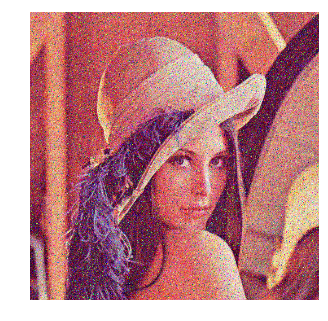

In [106]:
img_color_512_noise = cv2.imread("lena_color_512-noise.tif")
img_color_512 = cv2.imread("lena_color_512.tif")
show(img_color_512_noise)

In [113]:
def show_hist_rgb(img):
    color = ('b','g','r')
    fig = plt.figure(figsize=(20, 10))
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.show()

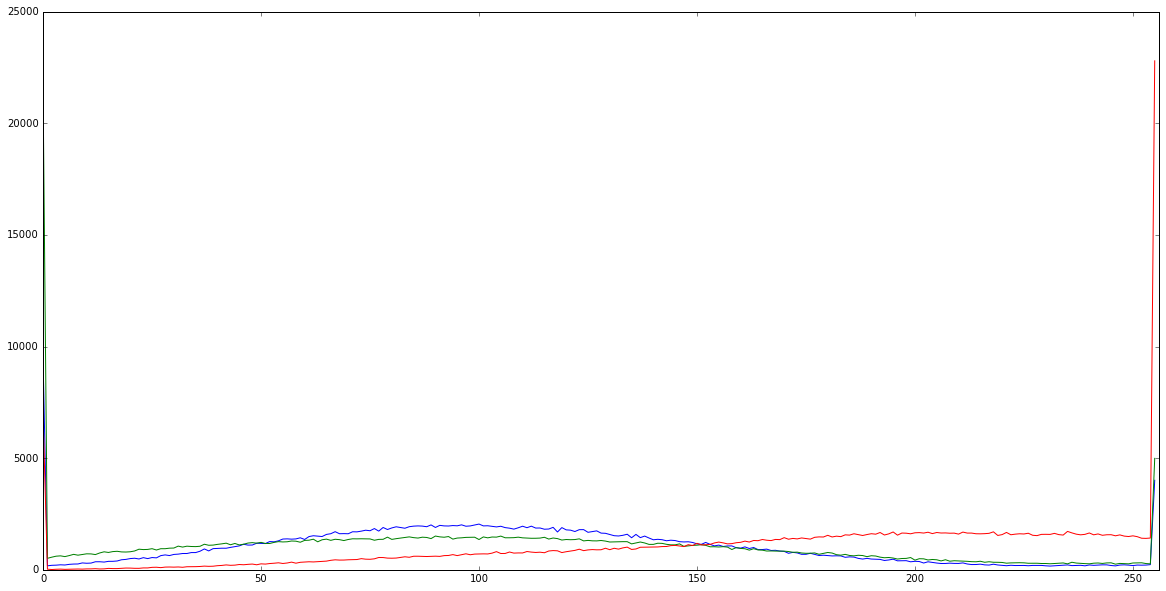

In [114]:
show_hist_rgb(img_color_512_noise)

Как видно из гистограммы данный шум - это шум "соль - перец". Значит уберем его медианным фильтром

MSE = 148.755564372


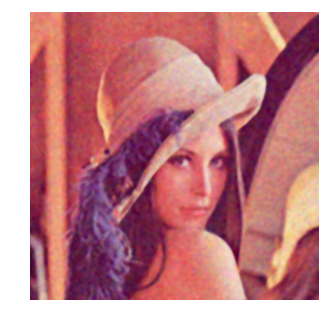

In [109]:
median_blur = cv2.medianBlur(img_color_512_noise, 7)
g_blur = cv2.GaussianBlur(median_blur,(3,3), 3)
print('MSE =', MSE(g_blur, img_color_512))
show(g_blur)

**8. (5 баллов)** Реализуйте функцию пространственной фильтрации изображения однородным усредняющим фильтром размера $n \times n$ (все коэффициенты маски равны $\frac{1}{n^2}$). При вычислении среднего используйте тот факт, что при переходе от точки к точке обновляется только часть элементов изображения под маской. Примените реализованный фильтр к предварительно переведенному в градации серого изображению $lena.jpg$ при $n = 3$ и $n = 5$. Постройте и сохраните изображение, представляющее собой разность полученных результатов фильтрации.

In [115]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [118]:
def get_mean_difference_gray(img_gray1, img_gray2):
    s1, s2 = img_gray1.shape
    diff = np.empty_like(img_gray1)
    for i in np.arange(s1):
        for j in np.arange(s2):
            g = (int)(img_gray1[i][j])
            t = (int)(img_gray2[i][j])
            diff[i][j] = abs(t - g)
    return diff

In [129]:
def w(img_gray, i, j, kernel):
    res = 0
    k1, k2 = kernel.shape
    s_i = i - k1 // 2
    s_j = j - k2 // 2
    i2 = 0
    for i1 in np.arange(s_i, s_i + k1, 1):
        j2 = 0
        for j1 in np.arange(s_j, s_j + k2, 1):
            if (i <= k1 or j <= k2 or 511 - i <= k1 or 511 - j <= k2):
                res += 0
            else:
                res +=img_gray[i1][j1] * kernel[i2][j2]
            j2 +=1
        i2 +=1    
    return res

def filter2D(img_gray, n):
    dst = np.zeros_like(img_gray)
    kernel = np.ones((n,n),np.float32) / (n*n)
    s1, s2 = img_gray.shape
    k1, k2 = kernel.shape
    for i in np.arange(s1):
        for j in np.arange(s2):
            dst[i][j] = w(img_gray, i, j, kernel)
            
    return dst        

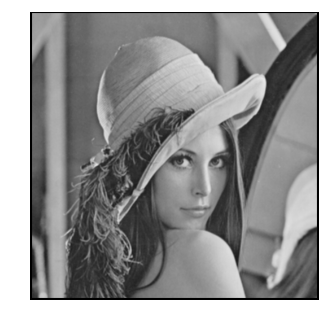

In [130]:
dst3 = filter2D(img_gray, 3)
show_gray(dst3)

In [131]:
dst3 = filter2D(img_gray, 3)
dst5 = filter2D(img_gray, 5)

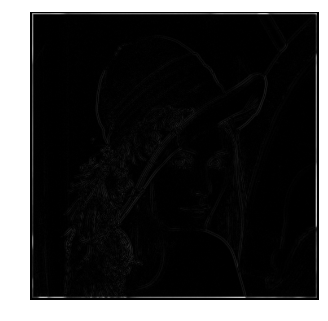

In [132]:
diff = get_mean_difference_gray(dst3, dst5)
show_gray(diff)